# Reto entrega 1

Brenda Zurazy Rodríguez Pérez

Cristian Jhovany Montelongo Medina 

**A01793984**

**A01793580**

---

Materia: Ciencia y analítica de Datos

Maestra: Maria de la Paz Rico

**16/noviembre/2022**

# Limpieza, análisis, visualización y agrupamiento.

**1. Limpieza de base de datos.**

In [1]:
import pandas as pd
#requests es para extraer la información de una página HTTP
import requests 
#zipfile proporciona herramientas para crear, leer, escribir, agregar y listar un archivo ZIP.
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 445 kB/s 
     |████████████████████████████████| 1.0 MB 38.4 MB/s 
     |████████████████████████████████| 1.7 MB 41.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 44.4 MB/s 
     |████████████████████████████████| 6.3 MB 20.9 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7eb857187359d9e10ad056fa5947805b8df3416d979c4eb9596727ced07776c0
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7a1026118a884a72521a5e3fb9a2aae2b20ea67904ed834b8a90f223428c7470
  Stored in directory: /root/.

In [3]:
import geopandas as gpd
from shapely.geometry import Point

In [4]:
#Leemos el archivo y vemos una muestra de 10 renglones
input='http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip';
req = requests.get(input)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
aguas_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
aguas_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [5]:
aguas_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [6]:
#Revisamos el tip de variable que tenemos en BD
aguas_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Tenemos una base con 1,068 observaciones y 57 variables.

Se tienen 5 variables tipo **float** y 5 tipo **object** y 1 **entero**

In [7]:
#¿falta algún dato?
aguas_sub.isnull().values.any()

True

In [8]:
#Contar nulos por variable
aguas_sub.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [9]:
#Contando el total de datos faltantes
aguas_sub.isnull().sum().sum()

1532

Hay 13 variables con datos nulos. En especial la variable **SDT_mg/L está completamente vacía.**

In [10]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
aguas = aguas_sub.copy()
aguas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [11]:
aguas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [12]:
#Revisando las variables numéricas
#Eliminamos la variables 'SDT_mg/L' ya que como vimos anteriormente, está vacia
df_num = aguas[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','SEMAFORO']]

In [13]:
#¿falta algún dato?
df_num.isnull().values.any()

True

In [14]:
#Contar nulos por variable
df_num.isnull().sum().sort_values(ascending=True)

FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
SEMAFORO               0
DUR_mg/L               1
N_NO3_mg/L             1
SDT_M_mg/L             2
ALC_mg/L               4
CONDUCT_mS/cm          6
dtype: int64

In [15]:
#Contando el total de datos faltantes
df_num.isnull().sum().sum()

14

In [16]:
#Se eliminan todas las observaciones con datos faltantes, ya que no se considero que sean 
df_num.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
#Revisando que ya no se tengan nulos
df_num.isnull().sum().sort_values(ascending=True)

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
SEMAFORO               0
dtype: int64

In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1054 non-null   float64
 1   CONDUCT_mS/cm        1054 non-null   float64
 2   SDT_M_mg/L           1054 non-null   object 
 3   FLUORUROS_mg/L       1054 non-null   object 
 4   DUR_mg/L             1054 non-null   object 
 5   COLI_FEC_NMP/100_mL  1054 non-null   object 
 6   N_NO3_mg/L           1054 non-null   object 
 7   AS_TOT_mg/L          1054 non-null   object 
 8   CD_TOT_mg/L          1054 non-null   object 
 9   CR_TOT_mg/L          1054 non-null   object 
 10  HG_TOT_mg/L          1054 non-null   object 
 11  PB_TOT_mg/L          1054 non-null   object 
 12  MN_TOT_mg/L          1054 non-null   object 
 13  FE_TOT_mg/L          1054 non-null   object 
 14  SEMAFORO             1054 non-null   object 
dtypes: float64(2), object(13)
memory usage

##Corregimos el tipo de variable



In [19]:
#Convertimos las variables objeto a tipo float
from IPython.core.interactiveshell import error
df_num['SDT_M_mg/L']=df_num['SDT_M_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#Revisando la frecuencia:
df_num['FLUORUROS_mg/L'].value_counts()

<0.2      158
0.466       3
0.5202      3
0.2158      2
0.219       2
         ... 
0.6045      1
0.7042      1
0.4343      1
0.7178      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 853, dtype: int64

In [21]:
#Corrigiendo los valores 
list_FLUORUROS = ['<0.2']
a=df_num[['FLUORUROS_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'FLUORUROS_mg/L'] in list_FLUORUROS:
     df_num.loc[i, 'FLUORUROS_mg/L'] = '0.2'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
#Convertimos las vatiables objeto a tipo float
from IPython.core.interactiveshell import error
df_num['FLUORUROS_mg/L']=df_num['FLUORUROS_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#Revisando la frecuencia:
df_num['DUR_mg/L'].value_counts()

<20        25
121.512     5
53.8542     4
109.56      4
148.44      3
           ..
51.454      1
103         1
24.8725     1
71.6184     1
362.544     1
Name: DUR_mg/L, Length: 881, dtype: int64

In [24]:
#Corrigiendo los valores 
list_DUR_mgL = ['<20']
a=df_num[['DUR_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'DUR_mg/L'] in list_DUR_mgL:
     df_num.loc[i, 'DUR_mg/L'] = '20'

In [25]:
#Convertimos las variables objeto a tipo float
df_num['DUR_mg/L']=df_num['DUR_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#Revisando la frecuencia:
df_num['COLI_FEC_NMP/100_mL'].value_counts()

<1.1    728
10       37
40       28
20       19
31       11
       ... 
2755      1
1607      1
175       1
2247      1
1658      1
Name: COLI_FEC_NMP/100_mL, Length: 124, dtype: int64

In [27]:
#Corrigiendo los valores 
list_COLI_FEC_NMP = ['<1.1']
a=df_num[['COLI_FEC_NMP/100_mL']].mode()
for i in df_num.index:
  if df_num.loc[i, 'COLI_FEC_NMP/100_mL'] in list_COLI_FEC_NMP:
     df_num.loc[i, 'COLI_FEC_NMP/100_mL'] = '1.1'

In [28]:
#Convertimos las variables objeto a tipo float
df_num['COLI_FEC_NMP/100_mL']=df_num['COLI_FEC_NMP/100_mL'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#Revisando la frecuencia:
df_num['N_NO3_mg/L'].value_counts()

<0.02       64
0.096        3
1.955        2
0.2162       2
0.029        2
            ..
0.7694       1
1.2477       1
0.0497       1
0.1972       1
0.811876     1
Name: N_NO3_mg/L, Length: 983, dtype: int64

In [30]:
#Corrigiendo los valores 
list_N_NO3 = ['<0.02']
a=df_num[['N_NO3_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'N_NO3_mg/L'] in list_N_NO3:
     df_num.loc[i, 'N_NO3_mg/L'] = '0.02'

In [31]:
#Convertimos las vrtiables objeto a tipo float
df_num['N_NO3_mg/L']=df_num['N_NO3_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#Revisando la frecuencia:
df_num['AS_TOT_mg/L'].value_counts()

<0.01     804
0.0135      4
0.0154      3
0.0217      3
0.0201      3
         ... 
0.027       1
0.0334      1
0.0376      1
0.0208      1
0.1397      1
Name: AS_TOT_mg/L, Length: 207, dtype: int64

In [33]:
#Corrigiendo los valores 
list_AS_TOT = ['<0.01']
a=df_num[['AS_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'AS_TOT_mg/L'] in list_AS_TOT:
     df_num.loc[i, 'AS_TOT_mg/L'] = '0.01'

In [34]:
#Convertimos las variables objeto a tipo float
df_num['AS_TOT_mg/L']=df_num['AS_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
#Revisando la frecuencia:
df_num['CD_TOT_mg/L'].value_counts()

<0.003     1052
0.0056        1
0.03211       1
Name: CD_TOT_mg/L, dtype: int64

In [36]:
#Corrigiendo los valores 
list_CD_TOT = ['<0.003']
a=df_num[['CD_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'CD_TOT_mg/L'] in list_CD_TOT:
     df_num.loc[i, 'CD_TOT_mg/L'] = '0.003'

In [37]:
#Convertimos las variables objeto a tipo float
df_num['CD_TOT_mg/L']=df_num['CD_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#Revisando la frecuencia:
df_num['CR_TOT_mg/L'].value_counts()

<0.005     844
0.005        7
0.0051       6
0.0053       5
0.0052       4
          ... 
0.0205       1
0.02508      1
0.01684      1
0.01874      1
0.01341      1
Name: CR_TOT_mg/L, Length: 165, dtype: int64

In [39]:
#Corrigiendo los valores 
list_CR_TOT = ['<0.005']
a=df_num[['CR_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'CR_TOT_mg/L'] in list_CR_TOT:
     df_num.loc[i, 'CR_TOT_mg/L'] = '0.005'

In [40]:
#Convertimos las variables objeto a tipo float
df_num['CR_TOT_mg/L']=df_num['CR_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
#Revisando la frecuencia:
df_num['HG_TOT_mg/L'].value_counts()

<0.0005    957
0.0006      13
0.0005       9
0.00086      4
0.00051      3
0.0008       3
0.00066      2
0.00065      2
0.00101      2
0.00128      2
0.00114      2
0.00064      2
0.0009       2
0.00052      2
0.0007       2
0.00121      2
0.00056      2
0.00189      1
0.00148      1
0.00151      1
0.00059      1
0.00074      1
0.001        1
0.00117      1
0.00167      1
0.00137      1
0.00184      1
0.00073      1
0.00289      1
0.0017       1
0.00138      1
0.00109      1
0.00077      1
0.00076      1
0.00084      1
0.00254      1
0.00122      1
0.01415      1
0.00314      1
0.00135      1
0.00149      1
0.00072      1
0.00058      1
0.00054      1
0.0013       1
0.00055      1
0.00131      1
0.00095      1
0.00156      1
0.00145      1
0.00134      1
0.00104      1
0.00127      1
0.00142      1
0.00155      1
0.00185      1
0.00216      1
0.0014       1
0.00168      1
0.00062      1
Name: HG_TOT_mg/L, dtype: int64

In [42]:
#Corrigiendo los valores 
list_HG_TOT = ['<0.0005']
a=df_num[['HG_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'HG_TOT_mg/L'] in list_HG_TOT:
     df_num.loc[i, 'HG_TOT_mg/L'] = '0.0005'

In [43]:
#Convertimos las variables objeto a tipo float
df_num['HG_TOT_mg/L']=df_num['HG_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
#Revisando la frecuencia:
df_num['PB_TOT_mg/L'].value_counts()

<0.005     1024
0.01225       1
0.00709       1
0.00596       1
0.046         1
0.005         1
0.00744       1
0.00644       1
0.00619       1
0.00703       1
0.0133        1
0.00734       1
0.00557       1
0.00777       1
0.01075       1
0.0116        1
0.0399        1
0.00556       1
0.00859       1
0.0086        1
0.00769       1
0.00737       1
0.00818       1
0.00813       1
0.01117       1
0.0152        1
0.0219        1
0.0809        1
0.0135        1
0.049         1
0.0053        1
Name: PB_TOT_mg/L, dtype: int64

In [45]:
#Corrigiendo los valores 
list_PB_TOT = ['<0.005']
a=df_num[['PB_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'PB_TOT_mg/L'] in list_PB_TOT:
     df_num.loc[i, 'PB_TOT_mg/L'] = '0.005'

In [46]:
#Convertimos las variables objeto a tipo float
df_num['PB_TOT_mg/L']=df_num['PB_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
#Revisando la frecuencia:
df_num['MN_TOT_mg/L'].value_counts()

<0.0015    541
0.0017      12
0.0021      10
0.0016       9
0.003        8
          ... 
0.0193       1
0.00445      1
0.0208       1
1.477        1
0.0242       1
Name: MN_TOT_mg/L, Length: 358, dtype: int64

In [48]:
#Corrigiendo los valores 
list_MN_TOT = ['<0.0015']
a=df_num[['MN_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'MN_TOT_mg/L'] in list_MN_TOT:
     df_num.loc[i, 'MN_TOT_mg/L'] = '0.0015'

In [49]:
#Convertimos las variables objeto a tipo float
df_num['MN_TOT_mg/L']=df_num['MN_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#Revisando la frecuencia:
df_num['FE_TOT_mg/L'].value_counts()

<0.025    396
0.0288      4
0.0492      4
0.0564      3
0.0483      3
         ... 
0.2241      1
1.2931      1
0.0412      1
0.2957      1
0.1786      1
Name: FE_TOT_mg/L, Length: 606, dtype: int64

In [51]:
#Corrigiendo los valores 
list_FE_TOT = ['<0.025']
a=df_num[['FE_TOT_mg/L']].mode()
for i in df_num.index:
  if df_num.loc[i, 'FE_TOT_mg/L'] in list_FE_TOT:
     df_num.loc[i, 'FE_TOT_mg/L'] = '0.025'

In [52]:
#Convertimos las variables objeto a tipo float
df_num['FE_TOT_mg/L']=df_num['FE_TOT_mg/L'].astype(float, errors='raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1054.0,234.695266,111.147849,26.6400,164.257500,215.825000,292.930000,1650.000000
CONDUCT_mS/cm,1054.0,1142.726471,1248.990617,110.0000,506.000000,820.000000,1328.000000,18577.000000
SDT_M_mg/L,1054.0,896.945797,2765.757924,101.2000,338.050000,551.400000,915.600000,82170.000000
FLUORUROS_mg/L,1054.0,1.078547,1.931204,0.2000,0.269475,0.506950,1.142400,34.803300
DUR_mg/L,1054.0,349.893584,360.960153,20.0000,121.512000,245.994450,455.617200,3810.692200
COLI_FEC_NMP/100_mL,1054.0,359.734156,2065.705773,1.1000,1.100000,1.100000,10.750000,24196.000000
N_NO3_mg/L,1054.0,4.321651,8.378332,0.0200,0.651667,2.082916,5.190385,121.007813
AS_TOT_mg/L,1054.0,0.019504,0.035051,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1054.0,0.003030,0.000900,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1054.0,0.013353,0.155412,0.0050,0.005000,0.005000,0.005000,5.003200


**2. Visualización.**

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([427.,   0., 382.,   0., 245.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

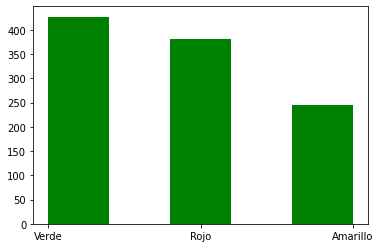

In [55]:
plt.hist(df_num['SEMAFORO'], bins=5, color ='green')

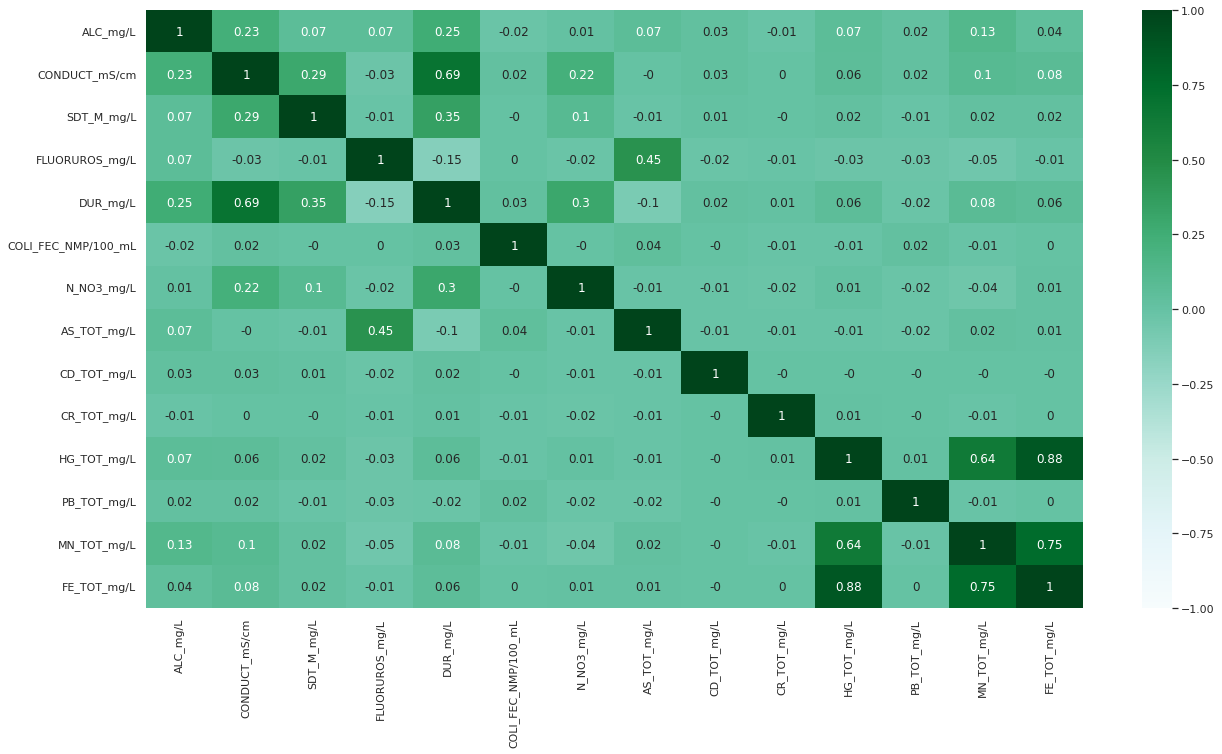

In [56]:
#Veamos la correlación de las variables
corrs = df_num.corr().round(2)

sns.set(rc = {'figure.figsize': (21,11)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ='BuGn', annot_kws={'size':12}, annot=True)

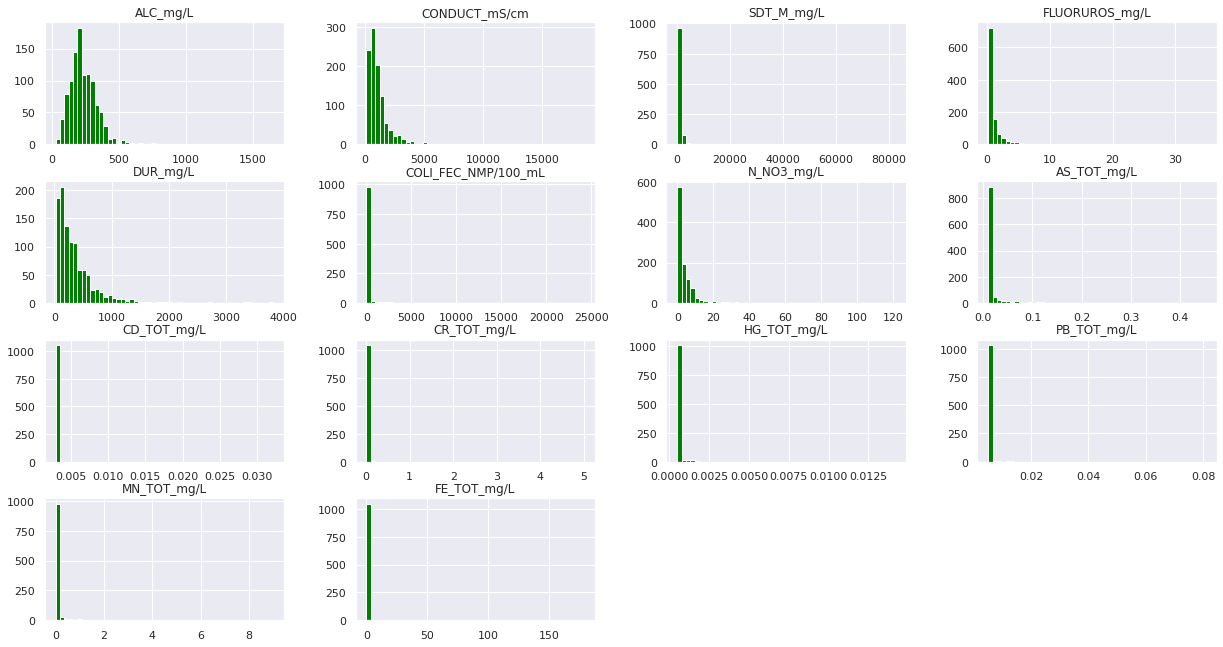

In [57]:
df_num.hist(bins=50, color ='green')
plt.show()

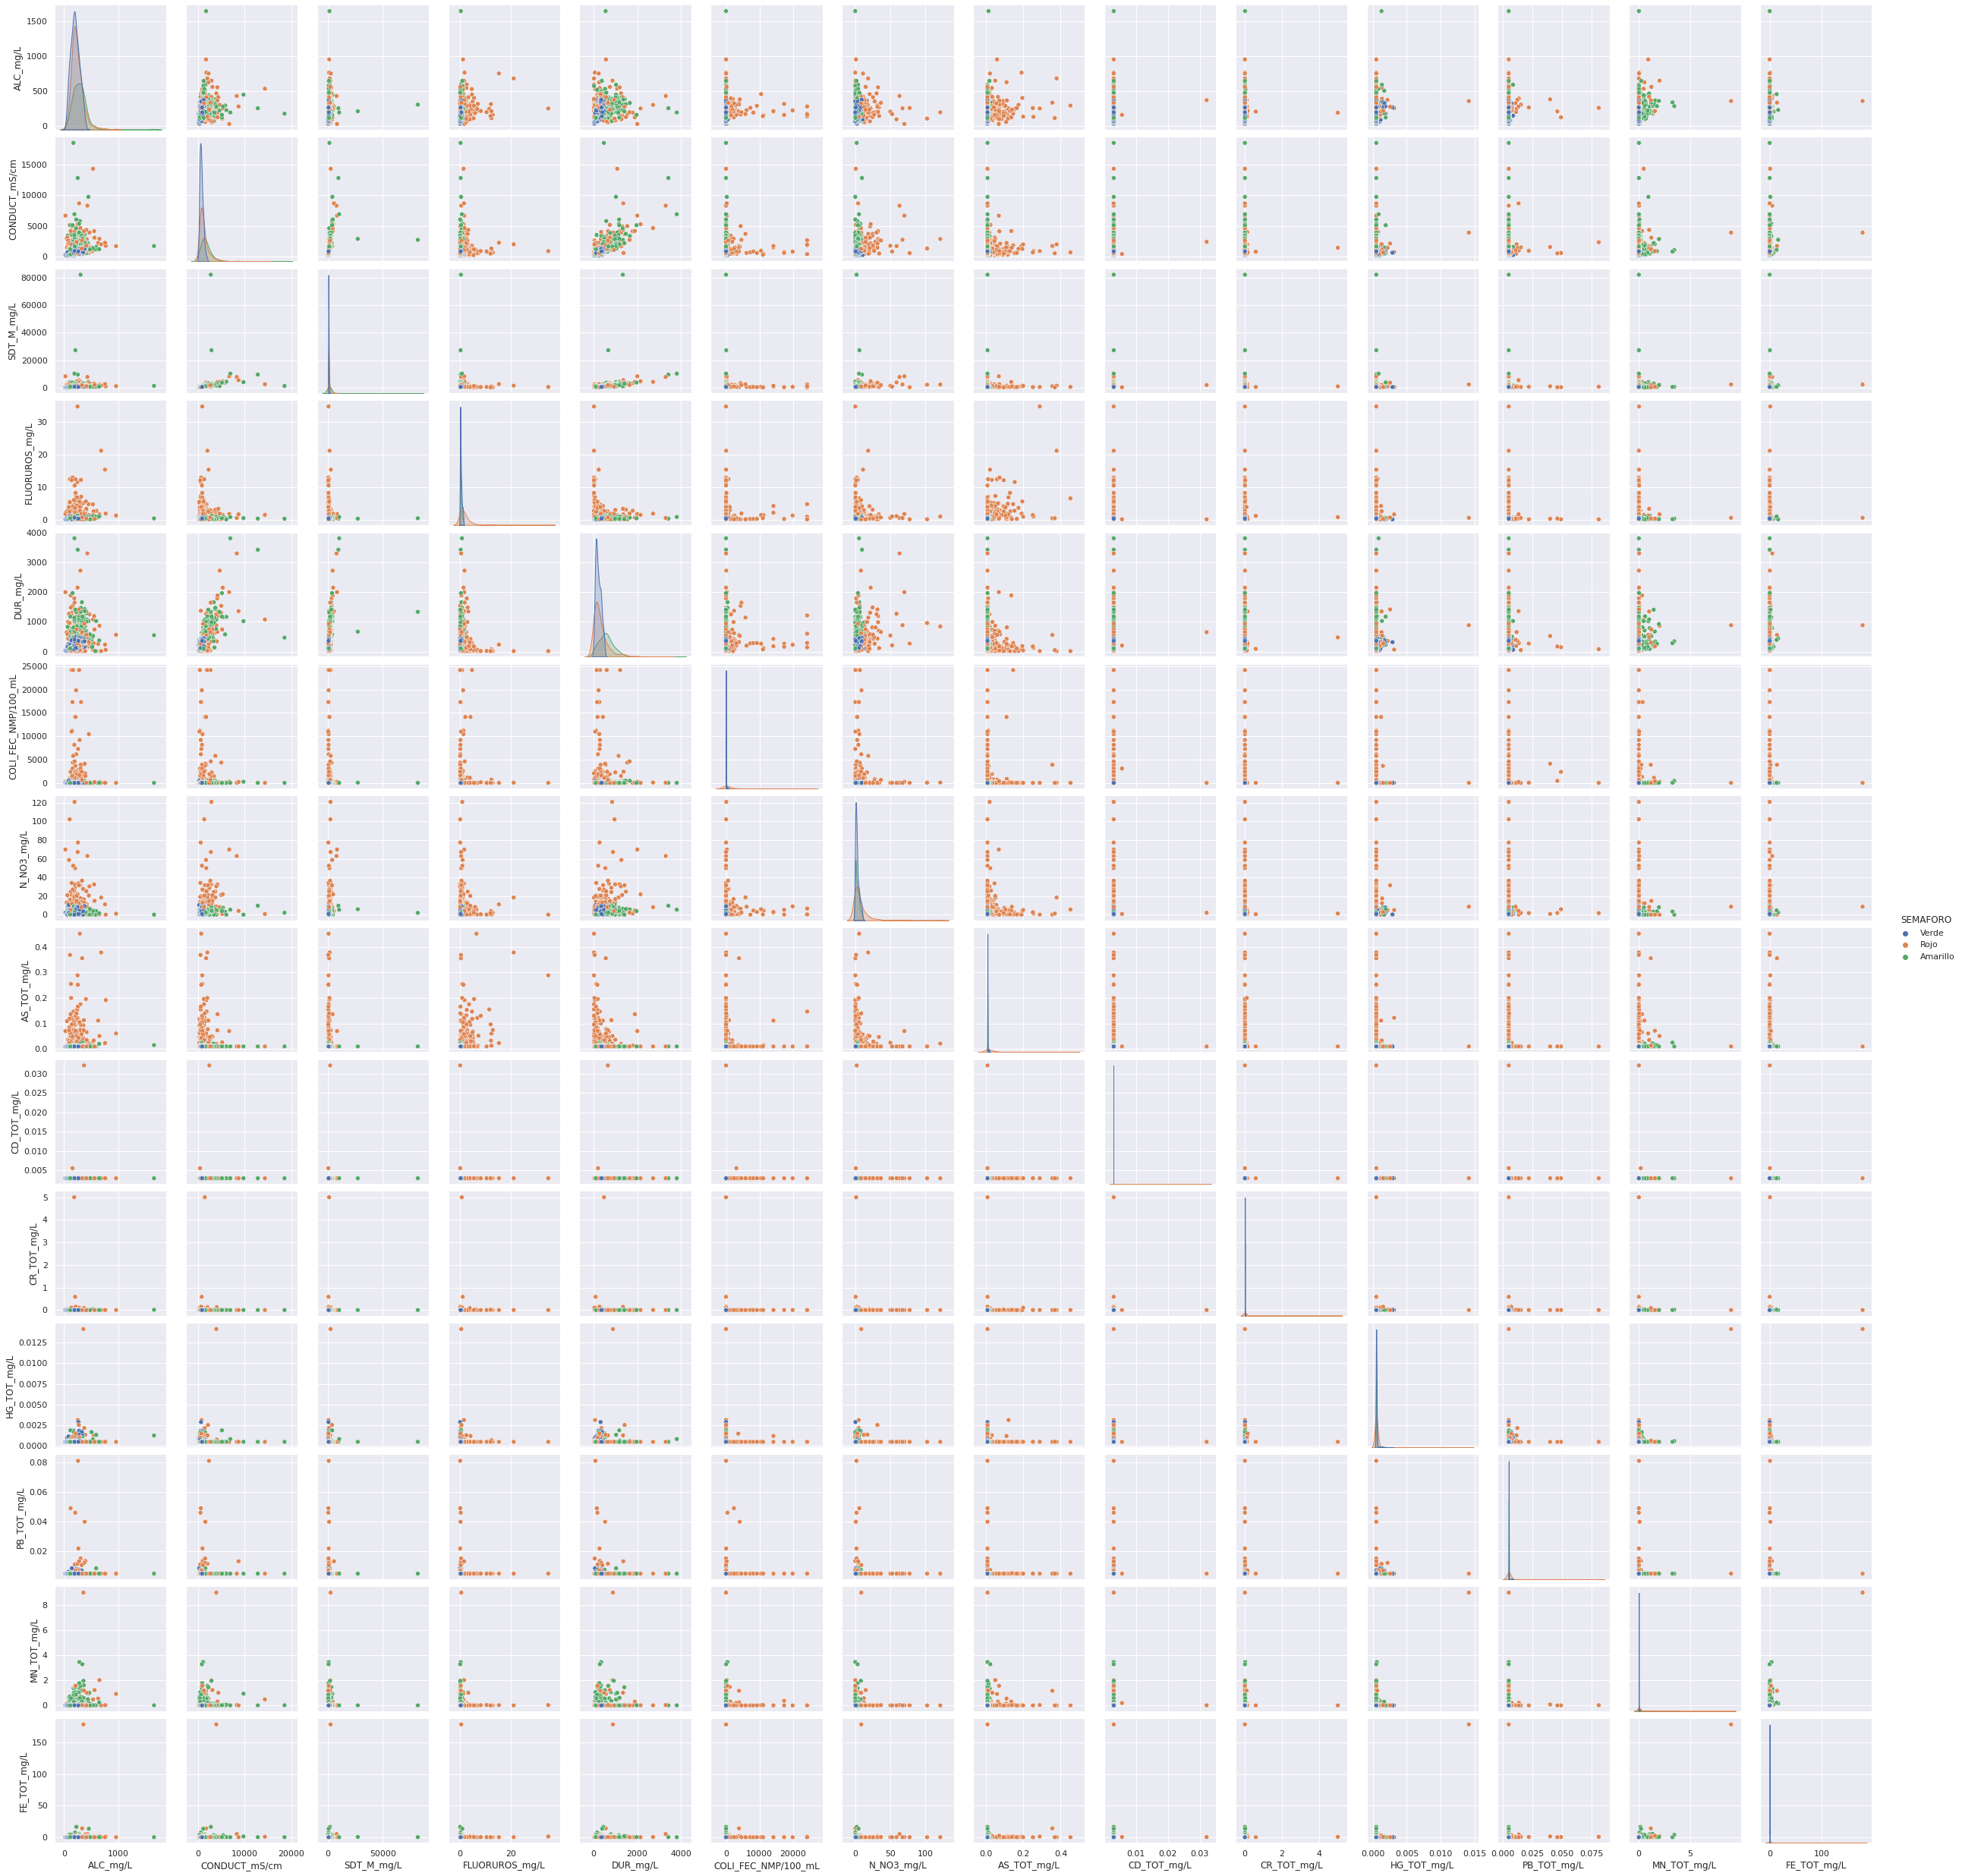

In [58]:
sns.pairplot(df_num, hue='SEMAFORO')

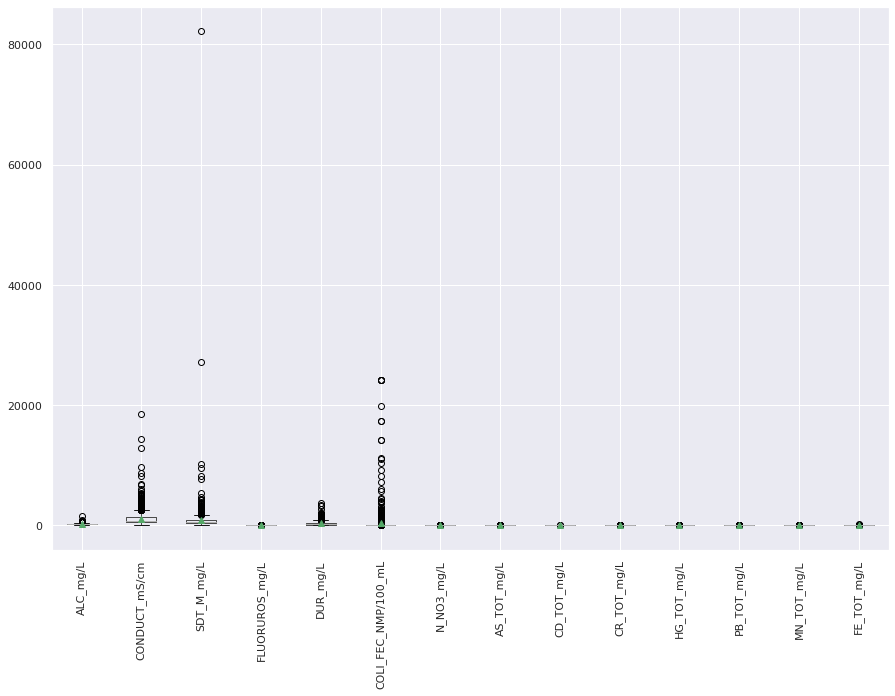

In [59]:
outliers = df_num.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

**3. Agrupamiento.**

In [60]:
#identificamos las variables para graficar la ubicacion geografica
df_geo = aguas[['LONGITUD','LATITUD']]
df_geo

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


### **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

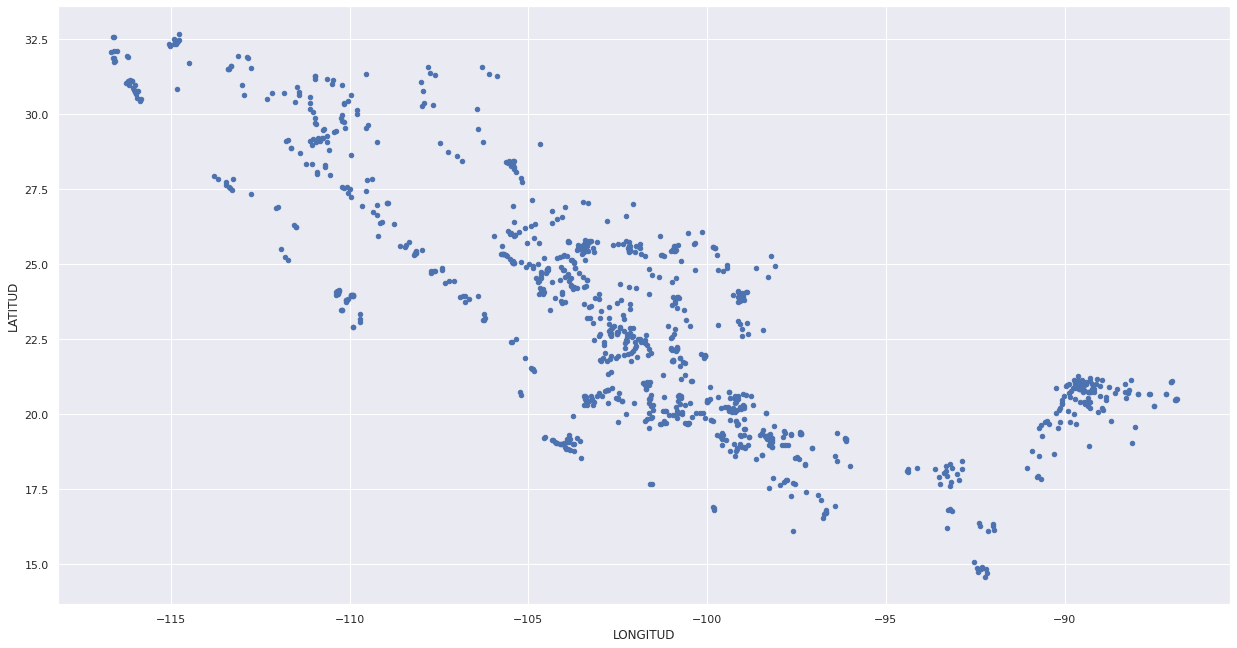

In [61]:
df_geo.plot.scatter('LONGITUD','LATITUD')

In [62]:
#Obteniendo coordenadas para Geopandas
df_geo
df_geo["COORDENADAS"] = list(zip(df_geo.LONGITUD, df_geo.LATITUD))
df_geo["COORDENADAS"] = df_geo["COORDENADAS"].apply(Point)
df_geo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


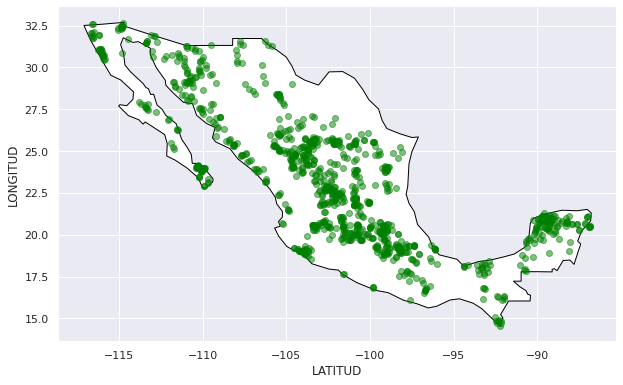

In [63]:
#Creando mapa con coordenadas
puntos_en_mapa = gpd.GeoDataFrame(df_geo, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='green', alpha = 0.5)
puntos_en_mapa

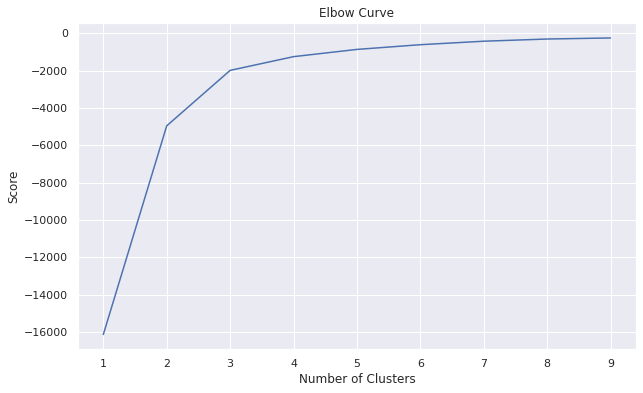

In [64]:
# Kmeans , vamos a agrupar por color o por ubicacion

from sklearn.cluster import KMeans


numero_de_closters = range(1,10) 
kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_geo[['LATITUD']]
X_axis = df_geo[['LONGITUD']]
kmeans_calculo = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, kmeans_calculo)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()



In [65]:
#Generando informacion de los 3 clusters
X = aguas_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroides

,0,1,Coordinates
0,-101.722127,22.254226,POINT (-101.72213 22.25423)
1,-110.794488,28.438202,POINT (-110.79449 28.43820)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


In [69]:
#imprimimos los numeros de elementos por cluster
aguas_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64